# Real-World Case Studies - FX Options

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

## Load the Libs we need

In [1]:
# import Lib
import pandas as pd
import datetime as dt
import pytz
import os
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import scipy.stats as norm
import math
import networkx as nx

# import module
from datetime import datetime, timezone
from datetime import date, time
from math import trunc
from dateutil.parser import parse
from scipy.optimize import minimize

## Introduction to Real-World FX Options Case Studies

In [2]:
import numpy as np
import scipy.stats as norm

def euro_option_pricing(S, K, T, rd, rf, vol, option_type="call"):
    # S: Current FX rate
    # K: Option strike price
    # T: Time to expiration
    # rd: domestic interest rate
    # rf: foreign interest rate
    # vol: Volatility
    d1 = (np.log(S / K) + (rd - rf + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)
    if option_type == "call":
        option_price = (S * np.exp(-rf * T) * norm.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-rd * T) * norm.norm.cdf(d2, 0.0, 1.0))
    elif option_type == "put":
        option_price = (K * np.exp(-rd * T) * norm.norm.cdf(-d2, 0.0, 1.0) - S * np.exp(-rf * T) * norm.norm.cdf(-d1, 0.0, 1.0))
    return option_price

# Example usage
S = 1.18  # Current FX rate EURUSD
K = 1.20  # Strike Price
T = 0.5  # Time to expiration in years
rd = 0.01  # Domestic interest rate
rf = 0.02  # Foreign interest rate
vol = 0.15  # Volatility

call_price = euro_option_pricing(S, K, T, rd, rf, vol, option_type="call")
put_price = euro_option_pricing(S, K, T, rd, rf, vol, option_type="put")

print(f"The price of the European Call Option is: {call_price:.4f}")
print(f"The price of the European Put Option is: {put_price:.4f}")


The price of the European Call Option is: 0.0381
The price of the European Put Option is: 0.0639


## FX Options Hedging Strategies

In [3]:
def delta(S, K, T, rd, rf, vol, option_type="call"):
    d1 = (np.log(S / K) + (rd - rf + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if option_type == "call":
        return np.exp(-rf * T) * norm.norm.cdf(d1, 0.0, 1.0)
    elif option_type == "put":
        return -np.exp(-rf * T) * norm.norm.cdf(-d1, 0.0, 1.0)

# Example usage
delta_call = delta(S, K, T, rd, rf, vol, option_type="call")

print(f"The delta of the European Call Option is: {delta_call:.4f}")


The delta of the European Call Option is: 0.4350


## Speculative Trading in FX Options

### Straddle Strategy

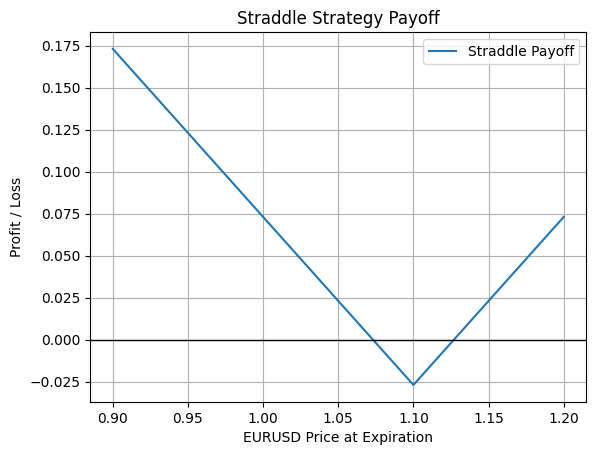

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S = np.linspace(0.9, 1.2, 100)  # EURUSD price range
strike_price = 1.10
call_premium = 0.0150
put_premium = 0.0120

# Payoff calculation
call_payoff = np.maximum(S - strike_price, 0) - call_premium
put_payoff = np.maximum(strike_price - S, 0) - put_premium
total_payoff = call_payoff + put_payoff

# Plot
plt.plot(S, total_payoff, label='Straddle Payoff')
plt.xlabel('EURUSD Price at Expiration')
plt.ylabel('Profit / Loss')
plt.axhline(0, color='black', lw=1)
plt.title('Straddle Strategy Payoff')
plt.legend()
plt.grid(True)
plt.show()


### Strangle Strategy

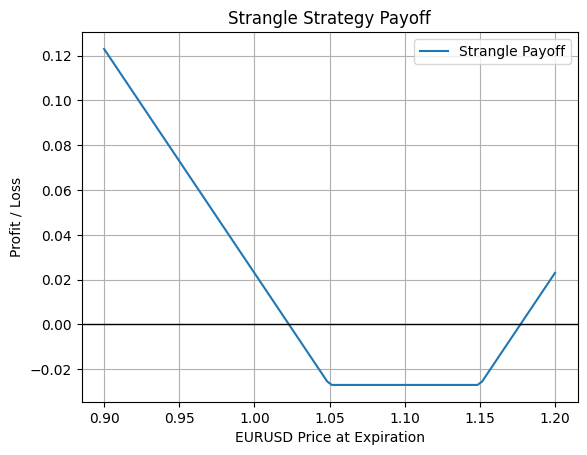

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Strangle Strategy Parameters
S = np.linspace(0.9, 1.2, 100)  # EURUSD price range
call_strike = 1.15
put_strike = 1.05
call_premium = 0.0150
put_premium = 0.0120

# Strangle Payoff Calculation
call_payoff_strangle = np.maximum(S - call_strike, 0) - call_premium
put_payoff_strangle = np.maximum(put_strike - S, 0) - put_premium
total_payoff_strangle = call_payoff_strangle + put_payoff_strangle

# Plotting Strangle Strategy
plt.plot(S, total_payoff_strangle, label='Strangle Payoff')
plt.xlabel('EURUSD Price at Expiration')
plt.ylabel('Profit / Loss')
plt.axhline(0, color='black', lw=1)
plt.title('Strangle Strategy Payoff')
plt.legend()
plt.grid(True)
plt.show()


### Butterfly Spread Strategy

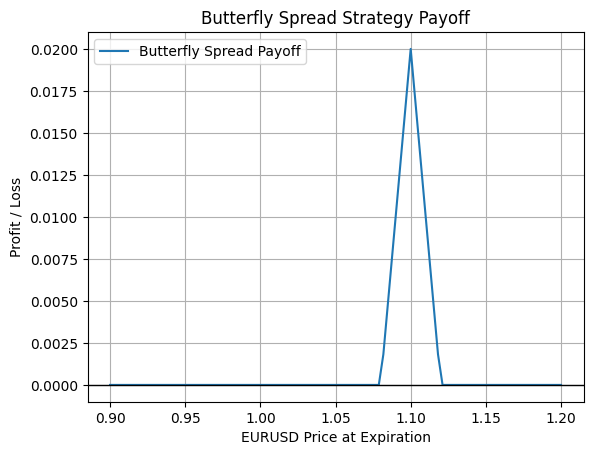

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Butterfly Spread Strategy Parameters
S = np.linspace(0.9, 1.2, 100)  # EURUSD price range
lower_strike = 1.08
middle_strike = 1.10
upper_strike = 1.12
option_premium = 0.005  # Assuming same premium for simplicity

# Butterfly Spread Payoff Calculation
lower_call_payoff = np.maximum(S - lower_strike, 0) - option_premium
middle_call_payoff = -2 * (np.maximum(S - middle_strike, 0) - option_premium)
upper_call_payoff = np.maximum(S - upper_strike, 0) - option_premium
total_payoff_butterfly = lower_call_payoff + middle_call_payoff + upper_call_payoff

# Plotting Butterfly Spread Strategy
plt.plot(S, total_payoff_butterfly, label='Butterfly Spread Payoff')
plt.xlabel('EURUSD Price at Expiration')
plt.ylabel('Profit / Loss')
plt.axhline(0, color='black', lw=1)
plt.title('Butterfly Spread Strategy Payoff')
plt.legend()
plt.grid(True)
plt.show()


### Iron Condor Strategy

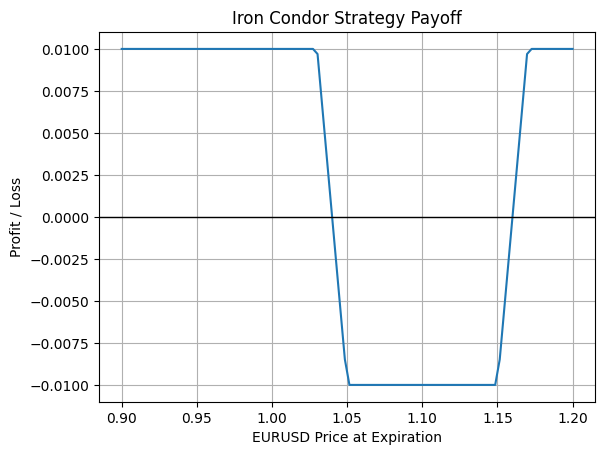

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def iron_condor(S, lower_strike_put, upper_strike_call, lower_strike_buy_put, upper_strike_buy_call, premium_sold, premium_bought):
    put_payoff = np.where(S < lower_strike_put, lower_strike_put - S, 0) - premium_sold
    call_payoff = np.where(S > upper_strike_call, S - upper_strike_call, 0) - premium_sold
    lower_buy_put_payoff = np.where(S < lower_strike_buy_put, S - lower_strike_buy_put, 0) + premium_bought
    upper_buy_call_payoff = np.where(S > upper_strike_buy_call, upper_strike_buy_call - S, 0) + premium_bought
    return put_payoff + call_payoff + lower_buy_put_payoff + upper_buy_call_payoff

# Parameters
S = np.linspace(0.9, 1.2, 100)  # EURUSD range
lower_strike_put = 1.05
upper_strike_call = 1.15
lower_strike_buy_put = 1.03
upper_strike_buy_call = 1.17
premium_sold = 0.02
premium_bought = 0.015

iron_condor_payoff = iron_condor(S, lower_strike_put, upper_strike_call, lower_strike_buy_put, upper_strike_buy_call, premium_sold, premium_bought)

plt.plot(S, iron_condor_payoff)
plt.title('Iron Condor Strategy Payoff')
plt.xlabel('EURUSD Price at Expiration')
plt.ylabel('Profit / Loss')
plt.axhline(0, color='black', lw=1)
plt.grid(True)
plt.show()


### Risk Reversal Strategy

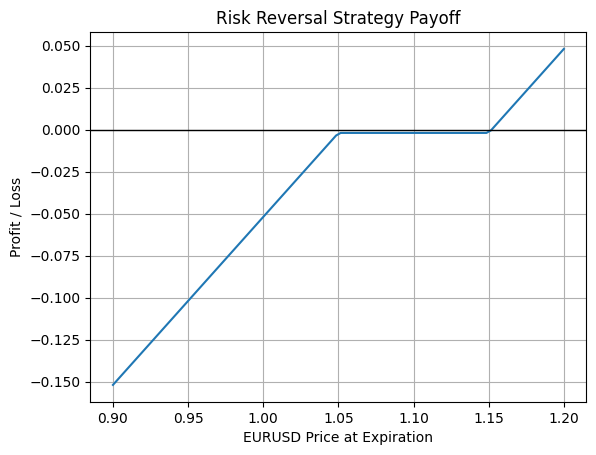

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def risk_reversal(S, call_strike, put_strike, call_premium, put_premium):
    call_payoff = np.maximum(S - call_strike, 0) - call_premium
    put_payoff = np.maximum(put_strike - S, 0) - put_premium
    return call_payoff - put_payoff  # Note: Selling the put, so we subtract its payoff

# Parameters
S = np.linspace(0.9, 1.2, 100)  # EURUSD range
call_strike = 1.15
put_strike = 1.05
call_premium = 0.02
put_premium = 0.018

risk_reversal_payoff = risk_reversal(S, call_strike, put_strike, call_premium, put_premium)

plt.plot(S, risk_reversal_payoff)
plt.title('Risk Reversal Strategy Payoff')
plt.xlabel('EURUSD Price at Expiration')
plt.ylabel('Profit / Loss')
plt.axhline(0, color='black', lw=1)
plt.grid(True)
plt.show()


## Risk Management in FX Options

### Calculating Value at Risk (VaR)

In [9]:
import numpy as np
import pandas as pd
from scipy.stats import norm

# Load historical price data (for demonstration, we'll use random data)
np.random.seed(42)
historical_returns = np.random.normal(0, 0.1, 100)  # Mock returns

# Define the portfolio value and confidence level
portfolio_value = 1000000  # $1,000,000
confidence_level = 0.95

# Calculate VaR
VaR = portfolio_value * (norm.ppf(1 - confidence_level, np.mean(historical_returns), np.std(historical_returns)))
print(f"Value at Risk at 95% confidence level: ${-VaR:,.2f}")


Value at Risk at 95% confidence level: $159,016.29


### Stress Testing

In [10]:
import numpy as np
import pandas as pd

# Assume a drastic drop in currency values or a spike in volatility
extreme_market_change = -0.2  # 20% market drop

# Apply the change to the portfolio's returns
stressed_returns = historical_returns * extreme_market_change
stressed_portfolio_value = portfolio_value * (1 + np.sum(stressed_returns))

print(f"Portfolio value after stress test: ${stressed_portfolio_value:,.2f}")


Portfolio value after stress test: $1,207,693.03


## Implementing Pricing and Valuation Models in FX Options

### Understanding the Model Dynamics

In [11]:
import numpy as np
from scipy.stats import norm

def black_scholes(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Example parameters
S = 1.10  # Current EURUSD rate
K = 1.15  # Strike price
T = 1  # Time to maturity in years
r = 0.01  # Risk-free rate
sigma = 0.1  # Volatility

call_option_price = black_scholes(S, K, T, r, sigma)
print(f"Call Option Price: {call_option_price:.2f}")


Call Option Price: 0.03


### Practical Steps for Implementation

In [12]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy.stats import norm

# Load historical data (for demonstration, using random data)
np.random.seed(42)
historical_prices = np.random.normal(1.10, 0.01, 100)  # Mock EURUSD prices

# Define the Black-Scholes call option pricing function
def black_scholes(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Calibration function to minimize
def calibrate_volatility(sigma, S, K, T, r, market_price):
    bs_price = black_scholes(S, K, T, r, sigma)
    return (bs_price - market_price) ** 2

# Market conditions and option data (mock)
S = 1.10  # Current EURUSD rate
K = 1.12  # Strike price
T = 1     # Time to maturity in years
r = 0.01  # Risk-free rate
market_price = 0.05  # Mock market price of the option

# Calibrate sigma
initial_guess = 0.2
result = minimize(calibrate_volatility, initial_guess, args=(S, K, T, r, market_price))
calibrated_sigma = result.x[0]

print(f"Calibrated Volatility (Sigma): {calibrated_sigma:.2f}")


Calibrated Volatility (Sigma): 0.12


### Emphasis on Real-World Application

In [13]:
import numpy as np
from scipy.stats import norm

# Black-Scholes Model
def black_scholes(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Market conditions before ECB announcement
S_initial = 1.10  # Initial EURUSD rate
K = 1.15  # Strike price
T = 1/12  # Time to maturity in years (1 month)
r = 0.01  # Risk-free rate
sigma_initial = 0.1  # Initial volatility

# Pricing the option before the announcement
initial_call_price = black_scholes(S_initial, K, T, r, sigma_initial)
print(f"Initial Call Option Price: {initial_call_price:.2f}")

# Simulating the ECB announcement effect
S_post = 1.12  # EURUSD rate after announcement
sigma_post = 0.15  # Increased volatility

# Pricing the option after the announcement
post_call_price = black_scholes(S_post, K, T, r, sigma_post)
print(f"Call Option Price Post-Announcement: {post_call_price:.2f}")


Initial Call Option Price: 0.00
Call Option Price Post-Announcement: 0.01


### Model Recalibration and Reliability

In [14]:
import numpy as np
from scipy.optimize import minimize
from scipy.stats import norm

# Black-Scholes model for call option
def black_scholes_call(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Objective function to minimize (calibrating the volatility)
def objective_function(sigma, market_price, S, K, T, r):
    return (black_scholes_call(S, K, T, r, sigma) - market_price) ** 2

# New market data (hypothetical)
new_market_prices = [1.08, 1.09, 1.10, 1.11, 1.12]  # Recent observed option prices
S = 1.10  # Current spot price
K = 1.12  # Strike price
T = 1/12  # Time to maturity (1 month)
r = 0.01  # Risk-free interest rate

# Calibrating the volatility based on new market data
initial_guess = 0.1
calibrated_volatility = minimize(objective_function, initial_guess, args=(new_market_prices[-1], S, K, T, r)).x[0]

print(f"Recalibrated Volatility: {calibrated_volatility:.2f}")

# Repricing the option with recalibrated volatility
repriced_option = black_scholes_call(S, K, T, r, calibrated_volatility)
print(f"Repriced Option Value: {repriced_option:.2f}")


Recalibrated Volatility: 25.37
Repriced Option Value: 1.10
